# **PROJECT 2: MLPs, CNNs, and Keras**
# Spring 2022
---

Group 1:

Justin Drouin

Cesar Martinez Melgoza

Michael Nguyen

Cody Shook


# **===== PART 1 =====**
---

**1.   As with Project 1, convert the images in TRAINING_SET, TEST_SET, and MESSAGE into two-dimensional NumPy arrays of size (# examples × # features).**



In [ ]:
from dataset import *
seed = 1
import random
import numpy as np
import tensorflow as tf
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
from keras.models import Sequential
from keras.layers import Dense

def convertimages(dataset):
  imageArray = []
  for num in range(0, len(dataset)):
    imageArray.append(dataset[num][1])
  numpyArray = np.array(imageArray, dtype = np.float32)
  return numpyArray

train_set = convertimages(TRAINING_SET)
test_set = convertimages(TEST_SET)
msg_set = np.array(MESSAGE, dtype = np.float32)

**2.   Rather than training 26 different perceptrons as you did in Project 1, this time you will use a single network with 26 possible outputs.
In order to use the character labels in TRAINING_SET and TEST_SET, convert them into integer class vectors using ord(), then into 26 one-hot encoded categorical features.**



In [ ]:
ord_charset = []
for num in range(0, 52):
  ord_charset.append(ord(TRAINING_SET[num][0]))
one_hot = tf.keras.utils.to_categorical(ord_charset, max(ord_charset) + 1)



**3.   Create a Sequential Keras model with a Dense hidden layer and a Dense output layer with softmax activation and categorical cross-entropy loss.**



In [ ]:
model = Sequential()
model.add(Dense(91, input_shape = (256,), activation = 'relu'))
model.add(Dense(91, activation = 'softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 91)                23387     
                                                                 
 dense_19 (Dense)            (None, 91)                8372      
                                                                 
Total params: 31,759
Trainable params: 31,759
Non-trainable params: 0
_________________________________________________________________


**4. Compile and fit the model to the training set. Train the model until the accuracy is as high as possible. You may wish to use an EarlyStopping callback.**

In [ ]:
data = train_set
labels = one_hot

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(
    data,
    labels,
    epochs = 1000,
    verbose = 2,
    batch_size = 52,
    callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3),
    shuffle = True,
    initial_epoch = 0
    )



Epoch 1/1000
1/1 - 0s - loss: 4.6760 - accuracy: 0.0385 - 433ms/epoch - 433ms/step
Epoch 2/1000
1/1 - 0s - loss: 4.6620 - accuracy: 0.0385 - 6ms/epoch - 6ms/step
Epoch 3/1000
1/1 - 0s - loss: 4.6482 - accuracy: 0.0385 - 7ms/epoch - 7ms/step
Epoch 4/1000
1/1 - 0s - loss: 4.6345 - accuracy: 0.0385 - 6ms/epoch - 6ms/step
Epoch 5/1000
1/1 - 0s - loss: 4.6208 - accuracy: 0.0385 - 6ms/epoch - 6ms/step
Epoch 6/1000
1/1 - 0s - loss: 4.6074 - accuracy: 0.0385 - 6ms/epoch - 6ms/step
Epoch 7/1000
1/1 - 0s - loss: 4.5940 - accuracy: 0.0385 - 6ms/epoch - 6ms/step
Epoch 8/1000
1/1 - 0s - loss: 4.5808 - accuracy: 0.0385 - 6ms/epoch - 6ms/step
Epoch 9/1000
1/1 - 0s - loss: 4.5676 - accuracy: 0.0385 - 6ms/epoch - 6ms/step
Epoch 10/1000
1/1 - 0s - loss: 4.5546 - accuracy: 0.0385 - 6ms/epoch - 6ms/step
Epoch 11/1000
1/1 - 0s - loss: 4.5416 - accuracy: 0.0385 - 7ms/epoch - 7ms/step
Epoch 12/1000
1/1 - 0s - loss: 4.5288 - accuracy: 0.0385 - 10ms/epoch - 10ms/step
Epoch 13/1000
1/1 - 0s - loss: 4.5161 - acc



**5. Evaluate the model on TEST_SET. What accuracy do you obtain? If the accuracy is less than 100%, which test images are misclassified? (You may wish to use the show(image) function you defined in the previous project.)**



In [ ]:
ord_charset = []
for num in range(0, 26):
  ord_charset.append(ord(TEST_SET[num][0]))
one_hot = tf.keras.utils.to_categorical(ord_charset, max(ord_charset) + 1)

data = test_set
labels = one_hot

predictions = model.predict(x = data, batch_size = 26, verbose = 0)

prediction_array = []
rounded_predictions = np.argmax(predictions, axis = -1)
for i in rounded_predictions:
  prediction_array.append(i)

answers_array = []
rounded_answers = np.argmax(labels, axis = -1)
for i in rounded_answers:
  answers_array.append(i)

model.evaluate(
    data,
    labels,
    batch_size = 52,
    verbose = 2,
    sample_weight = None
)

print()

print("Misclassified test images")
for i in range(0, 26):
  if answers_array[i] != prediction_array[i]:
    print("Target char:", chr(int(answers_array[i])), "and Predicted char:", chr(int(prediction_array[i])))


1/1 - 0s - loss: 1.9227 - accuracy: 0.5385 - 150ms/epoch - 150ms/step

Misclassified test images
Target char: A and Predicted char: G
Target char: H and Predicted char: R
Target char: M and Predicted char: K
Target char: N and Predicted char: R
Target char: O and Predicted char: D
Target char: Q and Predicted char: G
Target char: S and Predicted char: B
Target char: U and Predicted char: L
Target char: V and Predicted char: L
Target char: W and Predicted char: V
Target char: X and Predicted char: Y
Target char: Z and Predicted char: T


**6. How does this model compare with the performance of your perceptron models in Project 1?**



 

>  *   Our accuracy for MESSAGE from Project 1 ranged from 30-50%, so our accuracy with the model from Project 2 at around 53.85% has higher accuracy.






**7. All of the letters in MESSAGE were likely not decoded correctly, so let’s try to improve the performance of the model by adding additional hidden layers. Add two additional hidden layers of the same size as your original hidden layer, then repeat experiments (4) and (5). Does the performance improve?**

>  *   The performance drops from around 90.32% to 30.77% accuracy with the addition of two hidden layers.

In [ ]:
ord_charset = []
msg = list('THEFIVEBOXINGWIZARDSJUMPQUICKLY')
for num in range(0, len(msg_set)):
  ord_charset.append(ord(msg[num]))
one_hot = tf.keras.utils.to_categorical(ord_charset, max(ord_charset) + 1)

data = msg_set
labels = one_hot

predictions = model.predict(x = data, batch_size = 31, verbose = 0)

prediction_array = []
rounded_predictions = np.argmax(predictions, axis = -1)
for i in rounded_predictions:
  prediction_array.append(i)

answers_array = []
rounded_answers = np.argmax(labels, axis = -1)
for i in rounded_answers:
  answers_array.append(i)

print("Model Evaluation")
model.evaluate(
    data,
    labels,
    batch_size = 31,
    verbose = 2,
    sample_weight = None
)

print()

print("Misclassified test images")
for i in range(0, 26):
  if answers_array[i] != prediction_array[i]:
    print("Target char:", chr(int(answers_array[i])), "and Predicted char:", chr(int(prediction_array[i])))

Model Evaluation
1/1 - 1s - loss: 0.5820 - accuracy: 0.9032 - 659ms/epoch - 659ms/step

Misclassified test images
Target char: H and Predicted char: R
Target char: X and Predicted char: Y
Target char: Z and Predicted char: T


In [ ]:
model2 = Sequential()
model2.add(Dense(91, input_shape = (256,), activation = 'relu'))
model2.add(Dense(91, activation = 'relu'))
model2.add(Dense(91, activation = 'relu'))
model2.add(Dense(91, activation = 'softmax'))


#################################### Repeat Problem 4 ####################################
ord_charset = []
for num in range(0, 52):
  ord_charset.append(ord(TRAINING_SET[num][0]))
one_hot = tf.keras.utils.to_categorical(ord_charset, max(ord_charset) + 1)

data = train_set
labels = one_hot

model2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model2.fit(
    data,
    labels,
    epochs = 1000,
    verbose = 2,
    batch_size = 52,
    callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3),
    shuffle = True,
    initial_epoch = 0
    )

print()


#################################### Problem 5 ####################################
ord_charset = []
for num in range(0, 26):
  ord_charset.append(ord(TEST_SET[num][0]))
one_hot = tf.keras.utils.to_categorical(ord_charset, max(ord_charset) + 1)

data = test_set
labels = one_hot

predictions = model2.predict(x = data, batch_size = 26, verbose = 0)

prediction_array = []
rounded_predictions = np.argmax(predictions, axis = -1)
for i in rounded_predictions:
  prediction_array.append(i)

answers_array = []
rounded_answers = np.argmax(labels, axis = -1)
for i in rounded_answers:
  answers_array.append(i)

print("Model2 Evaluation")
model2.evaluate(
    data,
    labels,
    batch_size = 52,
    verbose = 2,
    sample_weight = None
)

print()

print("Misclassified test images")
for i in range(0, 26):
  if answers_array[i] != prediction_array[i]:
    print("Target char:", chr(int(answers_array[i])), "and Predicted char:", chr(int(prediction_array[i])))

Epoch 1/1000
1/1 - 1s - loss: 4.5989 - accuracy: 0.0000e+00 - 503ms/epoch - 503ms/step
Epoch 2/1000
1/1 - 0s - loss: 4.5889 - accuracy: 0.0000e+00 - 6ms/epoch - 6ms/step
Epoch 3/1000
1/1 - 0s - loss: 4.5790 - accuracy: 0.0000e+00 - 6ms/epoch - 6ms/step
Epoch 4/1000
1/1 - 0s - loss: 4.5692 - accuracy: 0.0000e+00 - 6ms/epoch - 6ms/step
Epoch 5/1000
1/1 - 0s - loss: 4.5596 - accuracy: 0.0000e+00 - 7ms/epoch - 7ms/step
Epoch 6/1000
1/1 - 0s - loss: 4.5501 - accuracy: 0.0000e+00 - 7ms/epoch - 7ms/step
Epoch 7/1000
1/1 - 0s - loss: 4.5408 - accuracy: 0.0000e+00 - 9ms/epoch - 9ms/step
Epoch 8/1000
1/1 - 0s - loss: 4.5317 - accuracy: 0.0192 - 13ms/epoch - 13ms/step
Epoch 9/1000
1/1 - 0s - loss: 4.5228 - accuracy: 0.0192 - 9ms/epoch - 9ms/step
Epoch 10/1000
1/1 - 0s - loss: 4.5141 - accuracy: 0.0192 - 8ms/epoch - 8ms/step
Epoch 11/1000
1/1 - 0s - loss: 4.5055 - accuracy: 0.0192 - 7ms/epoch - 7ms/step
Epoch 12/1000
1/1 - 0s - loss: 4.4971 - accuracy: 0.0192 - 14ms/epoch - 14ms/step
Epoch 13/1000

**8. Repeat experiment (7), adding additional layers of the same size until the message is decoded correctly. What results do you observe?**

>  * As we added more additional layers, the loss increased which resulted in a lower accuracy. Our model runs into the problem of overfitting since neural networks tend to be low bias and high variance. Therefore, with a small dataset, our neural network may not be able to generalize to new unseen data even though our training set accuracy was high.

In [ ]:
ord_charset = []
msg = list('THEFIVEBOXINGWIZARDSJUMPQUICKLY')
for num in range(0, len(msg_set)):
  ord_charset.append(ord(msg[num]))
one_hot = tf.keras.utils.to_categorical(ord_charset, max(ord_charset) + 1)

data = msg_set
labels = one_hot

predictions = model2.predict(x = data, batch_size = 31, verbose = 0)

prediction_array = []
rounded_predictions = np.argmax(predictions, axis = -1)
for i in rounded_predictions:
  prediction_array.append(i)

answers_array = []
rounded_answers = np.argmax(labels, axis = -1)
for i in rounded_answers:
  answers_array.append(i)

print("Model2 Evaluation")
model2.evaluate(
    data,
    labels,
    batch_size = 31,
    verbose = 2,
    sample_weight = None
)

print()

print("Misclassified test images")
for i in range(0, 26):
  if answers_array[i] != prediction_array[i]:
    print("Target char:", chr(int(answers_array[i])), "and Predicted char:", chr(int(prediction_array[i])))

print("\nAll classified test images")
for i in range(0, 26):
    print("Target char:", chr(int(answers_array[i])), "and Predicted char:", chr(int(prediction_array[i])))

Model2 Evaluation
1/1 - 0s - loss: 0.6574 - accuracy: 0.8387 - 277ms/epoch - 277ms/step

Misclassified test images
Target char: H and Predicted char: W
Target char: X and Predicted char: I
Target char: Z and Predicted char: T
Target char: R and Predicted char: I
Target char: D and Predicted char: S

All classified test images
Target char: T and Predicted char: T
Target char: H and Predicted char: W
Target char: E and Predicted char: E
Target char: F and Predicted char: F
Target char: I and Predicted char: I
Target char: V and Predicted char: V
Target char: E and Predicted char: E
Target char: B and Predicted char: B
Target char: O and Predicted char: O
Target char: X and Predicted char: I
Target char: I and Predicted char: I
Target char: N and Predicted char: N
Target char: G and Predicted char: G
Target char: W and Predicted char: W
Target char: I and Predicted char: I
Target char: Z and Predicted char: T
Target char: A and Predicted char: A
Target char: R and Predicted char: I
Target

#**===== PART 2 =====**
---
As described in Section 1.8 of the textbook, the MNIST dataset of handwritten digits is a standard benchmark for computer vision. This dataset is included with Keras and is a good introduction to working with larger datasets.
This notebook by Francois Chollet creates a simple Multilayer Perceptron as described in Section 2.1 of Deep Learning with Python, Second Edition. (Recall that this book is available from the library.)


**9. Load the EMNIST Letters dataset, and use plt.imshow() to verify that the image data has been loaded correctly and that the corresponding labels are correct.**


In [ ]:
import matplotlib.pyplot as plt

emnist = np.load('emnist_letters.npz')
print(emnist.files)

train_images = emnist['train_images']
train_labels = emnist['train_labels']
validate_images = emnist['validate_images']
validate_labels = emnist['validate_labels']
test_images = emnist['test_images']
test_labels = emnist['test_labels']

['train_images', 'train_labels', 'validate_images', 'validate_labels', 'test_images', 'test_labels']


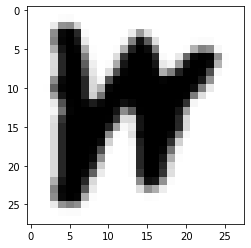

In [ ]:
trainLetter = train_images[0].reshape(28,28)
plt.imshow(trainLetter, cmap='binary')

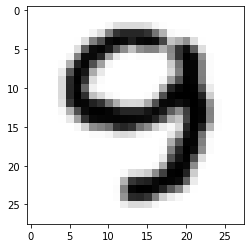

In [ ]:
validateLetter = validate_images[0].reshape(28,28)
plt.imshow(validateLetter, cmap='binary')

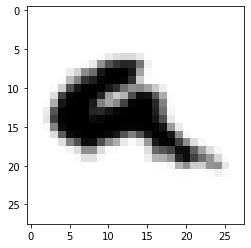

In [ ]:
testLetter = test_images[0].reshape(28,28)
plt.imshow(testLetter, cmap='binary')

In [ ]:
train_images.shape

(104000, 784)

In [ ]:
len(train_labels)

104000

In [ ]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
test_images.shape

(20800, 784)

In [ ]:
len(test_labels)

20800

In [ ]:
test_labels

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

**10a. Apply the network architecture from Chollet’s MNIST notebook to the EMNIST Letters data. (You will need to modify the numbers of inputs and outputs, but should leave the dense layer intact.)**

**11. Keeping the same number of layers in the network (i.e. an MLP with a single hidden layer), modify the architecture to improve the accuracy. You will need to decide on an appropriate number of neurons in the hidden layer. Keep in mind that:**

>a. There are 27 classes rather than 10, so you will need a larger hidden layer than the MNIST network.

>b. In addition to having more classes, EMNIST Letters mixes upper- and lowercase letters within each class, so even with enough neurons in the hidden layer, your accuracy is likely to be lower.  See the details in the EMNIST paper for the kind of performance you might reasonably expect.

>c. The Keras fit() method can take a validation_data parameter in order to evaluate metrics on the validation set.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Applied Chollet's MNist network architecture
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(27, activation="softmax")
])

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# Reshape 1D images array to have 2D shape (784,)
train_images = train_images.reshape((104000, 28 * 28))
validate_images = validate_images.reshape((20800, 28 * 28))
test_images = test_images.reshape((20800, 28 * 28))

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128, validation_data=(validate_images, validate_labels))

Epoch 1/5
813/813 [==============================] - 10s 11ms/step - loss: 0.7682 - accuracy: 0.7750 - val_loss: 0.4768 - val_accuracy: 0.8570
Epoch 2/5
813/813 [==============================] - 9s 11ms/step - loss: 0.3941 - accuracy: 0.8783 - val_loss: 0.3814 - val_accuracy: 0.8846
Epoch 3/5
813/813 [==============================] - 9s 11ms/step - loss: 0.3110 - accuracy: 0.9003 - val_loss: 0.3319 - val_accuracy: 0.8976
Epoch 4/5
813/813 [==============================] - 9s 11ms/step - loss: 0.2632 - accuracy: 0.9151 - val_loss: 0.3162 - val_accuracy: 0.9002
Epoch 5/5
813/813 [==============================] - 9s 11ms/step - loss: 0.2323 - accuracy: 0.9233 - val_loss: 0.3094 - val_accuracy: 0.9038


**10b. What accuracy do you achieve? How does this compare with the accuracy for MNIST?**

>  *   As seen below in the next 2 cells, our accuracy is around 90.13%, where the accuracy for MNIST is around 98.08%

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

650/650 [==============================] - 3s 4ms/step - loss: 0.3178 - accuracy: 0.9013
test_acc: 0.9012981057167053


**MNIST accuracy from notebook by Francois Chollet:**

313/313 [==============================] - 1s 3ms/step - loss: 0.0688 - accuracy: 0.9808

test_acc: 0.9807999730110168

**12a. The Keras examples include a Simple MNIST convnet. Note the accuracy obtained by that code compared to the previous example from Chollet.
Rather than building a deeper MLP, let’s apply this architecture to the EMNIST Letters data.**

In [ ]:
# Reshape 1D images array to have 2D shape (28, 28)
train_images = train_images.reshape((104000, 28, 28))
validate_images = validate_images.reshape((20800, 28, 28))
test_images = test_images.reshape((20800, 28, 28))

# Make sure images have shape (28, 28, 1)
train_images = np.expand_dims(train_images, -1)
validate_images = np.expand_dims(validate_images, -1)
test_images = np.expand_dims(test_images, -1)
print("x_train shape:", train_images.shape)
print(train_images.shape[0], "train samples")
print(test_images.shape[0], "test samples")

x_train shape: (104000, 28, 28, 1)
104000 train samples
20800 test samples


In [ ]:
# Chollet's Simple MNIST covnet architecture applied to our EMNIST Letters data
model = keras.Sequential([
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(27, activation="softmax"),
    ])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)            

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

**12b. What accuracy do you achieve? How does this compare with the accuracy for the MNIST dataset?**

> * As seen below in the next 3 cells, our accuracy is around 92%, where the accuracy for MNIST is around 99.22%

In [ ]:
model.fit(train_images, train_labels, epochs=15, batch_size=128, validation_data=(validate_images, validate_labels))

Epoch 1/15
813/813 [==============================] - 90s 110ms/step - loss: 0.8306 - accuracy: 0.7472 - val_loss: 0.4057 - val_accuracy: 0.8747
Epoch 2/15
813/813 [==============================] - 89s 110ms/step - loss: 0.4492 - accuracy: 0.8592 - val_loss: 0.3262 - val_accuracy: 0.8988
Epoch 3/15
813/813 [==============================] - 90s 110ms/step - loss: 0.3790 - accuracy: 0.8807 - val_loss: 0.2920 - val_accuracy: 0.9098
Epoch 4/15
813/813 [==============================] - 90s 111ms/step - loss: 0.3412 - accuracy: 0.8920 - val_loss: 0.2663 - val_accuracy: 0.9173
Epoch 5/15
813/813 [==============================] - 91s 111ms/step - loss: 0.3155 - accuracy: 0.8991 - val_loss: 0.2523 - val_accuracy: 0.9217
Epoch 6/15
813/813 [==============================] - 89s 110ms/step - loss: 0.3007 - accuracy: 0.9038 - val_loss: 0.2423 - val_accuracy: 0.9248
Epoch 7/15
813/813 [==============================] - 90s 110ms/step - loss: 0.2822 - accuracy: 0.9089 - val_loss: 0.2397 - val_ac

In [ ]:
predictions = model.predict(test_images, batch_size = 128, verbose = 0)

prediction_array = []
rounded_predictions = np.argmax(predictions, axis = -1)
for i in rounded_predictions:
  prediction_array.append(i)

answers_array = []
rounded_answers = np.argmax(test_labels, axis = -1)
for i in rounded_answers:
  answers_array.append(i)

score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2083428055047989
Test accuracy: 0.9342788457870483


**Simple MNIST convnet accuracy from Francois Chollet**

Test loss: 0.023950600996613503

Test accuracy: 0.9922000169754028

**13a. Use plt.imshow() to view some of the misclassified images and examine their labels.**

In [ ]:
count = 0 
classDict = dict.fromkeys([1,2,3,4,5,6,7,8,9,10,11,12,13,
                           14,15,16,17,18,19,20,21,22,23,24,25,26], 0)

print()
print("Misclassified test images")
for i in range(0, len(test_images)):
  if answers_array[i] != prediction_array[i]:
    count += 1
    for key in classDict.keys():
      if(key == answers_array[i]):
        classDict[key] += 1
    print("Index #", i,"Target Class:", answers_array[i], "and Predicted Class:", prediction_array[i])
print("Mispredictions:", count)



Misclassified test images
Index # 44 Target Class: 1 and Predicted Class: 21
Index # 68 Target Class: 1 and Predicted Class: 17
Index # 76 Target Class: 1 and Predicted Class: 17
Index # 90 Target Class: 1 and Predicted Class: 17
Index # 119 Target Class: 1 and Predicted Class: 4
Index # 191 Target Class: 1 and Predicted Class: 4
Index # 201 Target Class: 1 and Predicted Class: 26
Index # 207 Target Class: 1 and Predicted Class: 3
Index # 209 Target Class: 1 and Predicted Class: 7
Index # 214 Target Class: 1 and Predicted Class: 26
Index # 218 Target Class: 1 and Predicted Class: 7
Index # 240 Target Class: 1 and Predicted Class: 17
Index # 253 Target Class: 1 and Predicted Class: 14
Index # 254 Target Class: 1 and Predicted Class: 17
Index # 288 Target Class: 1 and Predicted Class: 13
Index # 289 Target Class: 1 and Predicted Class: 7
Index # 290 Target Class: 1 and Predicted Class: 4
Index # 299 Target Class: 1 and Predicted Class: 8
Index # 350 Target Class: 1 and Predicted Class: 

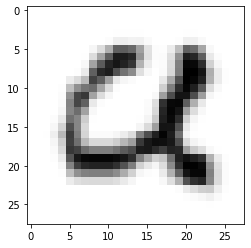

In [ ]:
testLetter = test_images[44].reshape(28,28)
plt.imshow(testLetter, cmap='binary')

* As shown below, the above image was predicted as "u", when it actually was "a".

In [ ]:
answers_array[44]

1

In [ ]:
prediction_array[44]

21

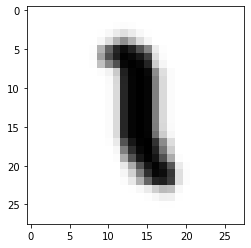

In [ ]:
testLetter2 = test_images[9500].reshape(28,28)
plt.imshow(testLetter2, cmap='binary')

* As shown below, the above image was predicted as "i", when it actually was "l".

In [ ]:
answers_array[9500]

12

In [ ]:
prediction_array[9500]

9

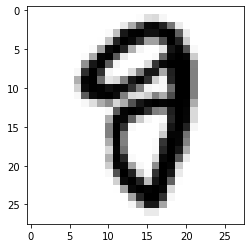

In [ ]:
testLetter3 = test_images[5143].reshape(28,28)
plt.imshow(testLetter3, cmap='binary')

* As shown below, the above image was predicted to be "q", when it actually was "g".

In [ ]:
answers_array[5143]

7

In [ ]:
prediction_array[5143]

17

* The following is a dictionary that contains how many times each class of letters was misclassified.

In [ ]:
classDict

{1: 43,
 2: 31,
 3: 21,
 4: 58,
 5: 27,
 6: 43,
 7: 143,
 8: 46,
 9: 139,
 10: 47,
 11: 34,
 12: 251,
 13: 7,
 14: 30,
 15: 20,
 16: 19,
 17: 120,
 18: 40,
 19: 20,
 20: 30,
 21: 71,
 22: 31,
 23: 18,
 24: 27,
 25: 40,
 26: 11}

**13b. Describe what you think might have gone wrong:**
> * There were handwritten letters that closely resembled other letters in the alphabet, resulting in around 1367 total mispredictions from one run of our experiment. "G/g" and "Q/q", "I/i" and "L/l" were the ones with the most mispredictions